In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
from mpl_toolkits import mplot3d
import os
#import sklearn as sk
#import scipy as sc
#import keras as ks
#import tensorflow as tf

%matplotlib inline

In [2]:
path_m,path_r = "/home/tannus/res/merge","/home/tannus/res/radix"
files_m,files_r = [],[]

for r, d, f in os.walk(path_m):
    for file in f:
        files_m.append(os.path.join(r, file))
for r, d, f in os.walk(path_r):
    for file in f:
        files_r.append(os.path.join(r, file))
        
avg1,avg2 = [],[]
#for i in range(600):
for file_r,file_m in zip(files_r,files_m):
        f1,f2 = open(file_r),open(file_m)
        avg1.append([float(x) for x in f1.readlines()])
        avg2.append([float(x) for x in f2.readlines()])
        f1.close()
        f2.close()

final_radix = np.mean(avg1, axis=0)
final_merge = np.mean(avg2, axis=0)

In [3]:
merge = final_merge
radix = final_radix

m3,m4,r3,r4 = [],[],[],[]



i = 0
for row,wor in zip(merge,radix):
    if i%2 == 0:
        r3.append(wor)
        m3.append(row)
    else:
        m4.append(row)
        r4.append(wor)
    i+=1

In [4]:
dig_m3,dig_m4,dig_r3,dig_r4 = m3,m4,r3,r4

In [5]:
i,j,k = 0,0,0
den_m3, den_m4, den_r3, den_r4 = [0]*300,[0]*300,[0]*300,[0]*300

for i in range(15):
    for j in range(i, 300, 15):
        den_m3[k],den_m4[k],den_r3[k],den_r4[k] = m3[j],m4[j],r3[j],r4[j]
        k+=1

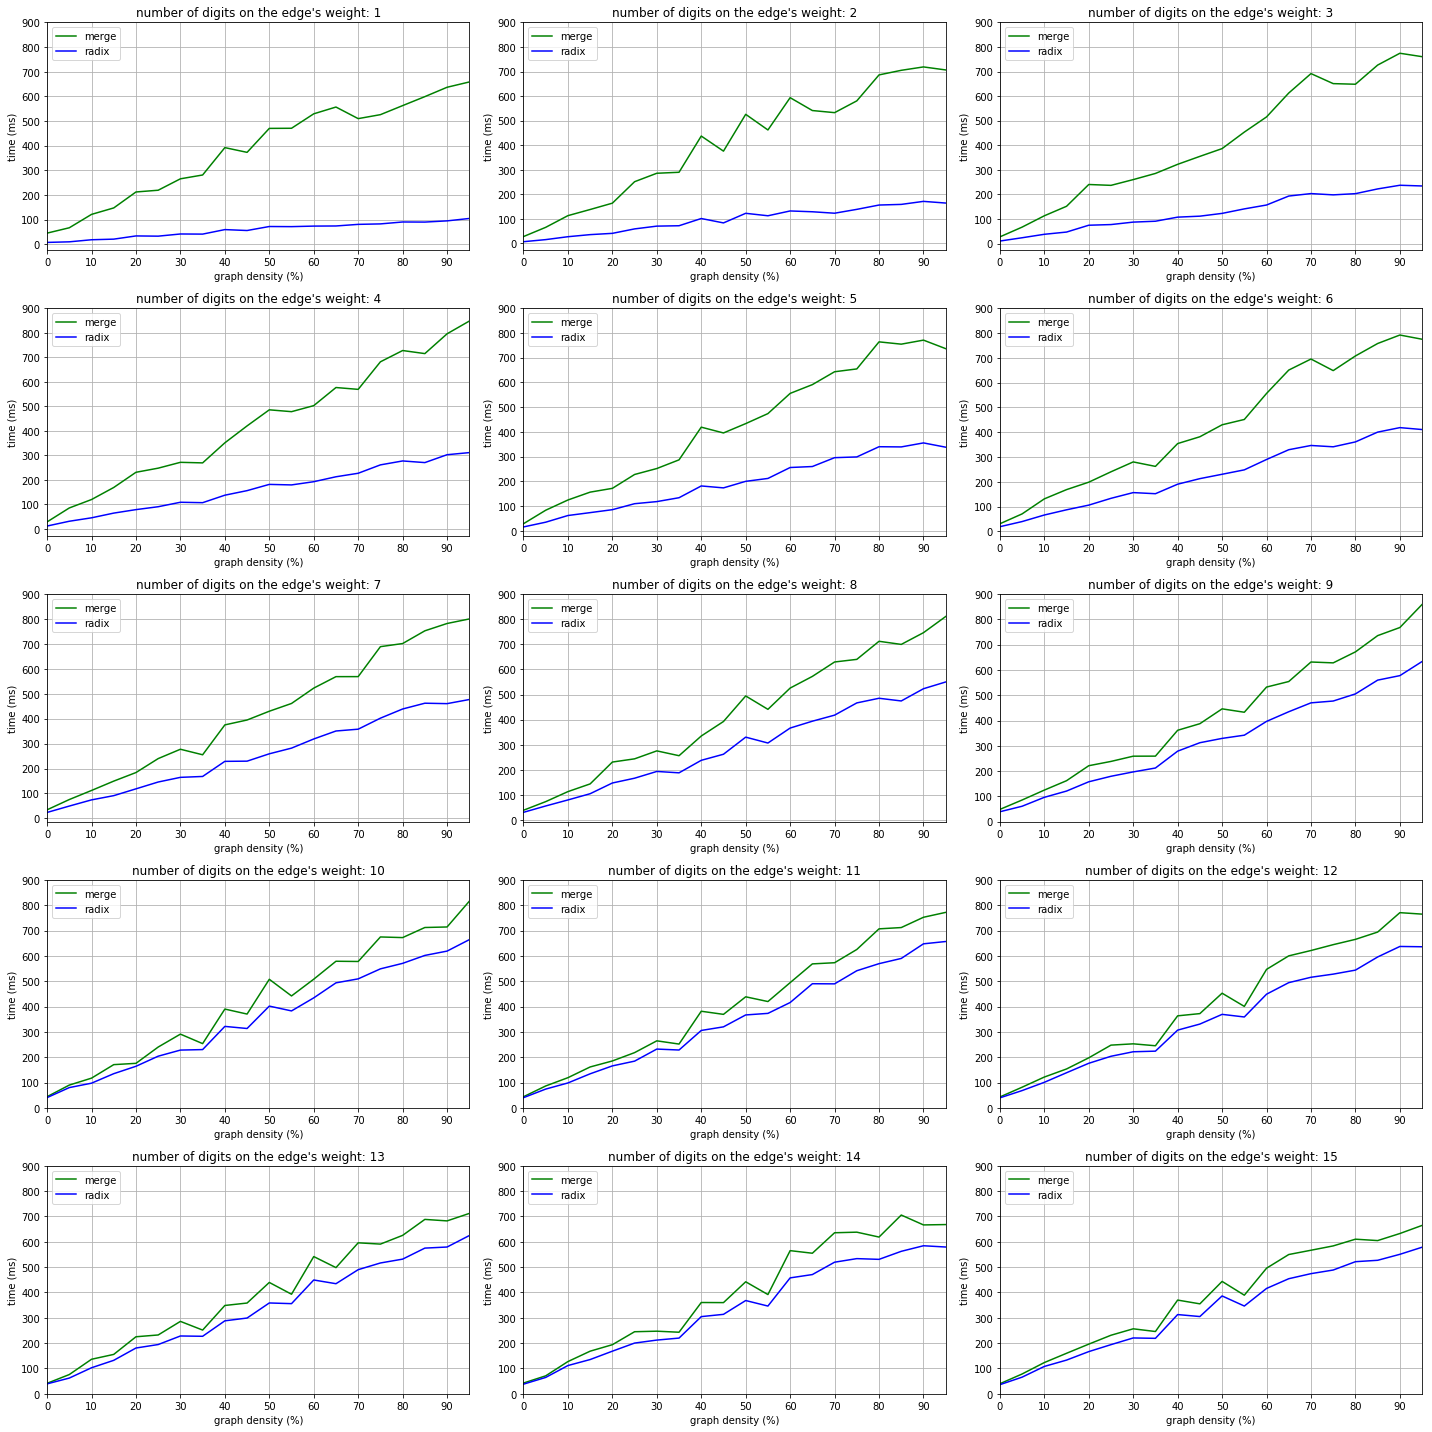

In [6]:
rot = ['0','10','20','30','40','50','60','70','80','90','100']
ys = []
for i in range(15):
    n = 0+20*i
    m = 20+20*i
    ys.append(den_m3[n:m])
    ys.append(den_r3[n:m])
    
x_ax = np.arange(20)
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(20,20))

k=0
for i in range(5):
    for j in range(3):
        y_ax = ys[k]
        k+=1
        pd.Series(y_ax, index=x_ax).plot(kind='line', ax=axs[i][j], color='green',label='merge')
        y_ax = ys[k]
        k+=1
        pd.Series(y_ax, index=x_ax).plot(kind='line', ax=axs[i][j], color='blue',label='radix')
        axs[i][j].set_yticks(range(0,1000,100))
        axs[i][j].set_xticks(range(0,20,2))
        axs[i][j].set_xticklabels(rot)
        axs[i][j].grid(0.3)
        axs[i][j].set(xlabel='graph density (%)', ylabel='time (ms)')
        axs[i][j].set_title('number of digits on the edge\'s weight: {}'.format(int(k/2)))
        axs[i][j].legend(loc='upper left')
        
plt.tight_layout()
plt.show()

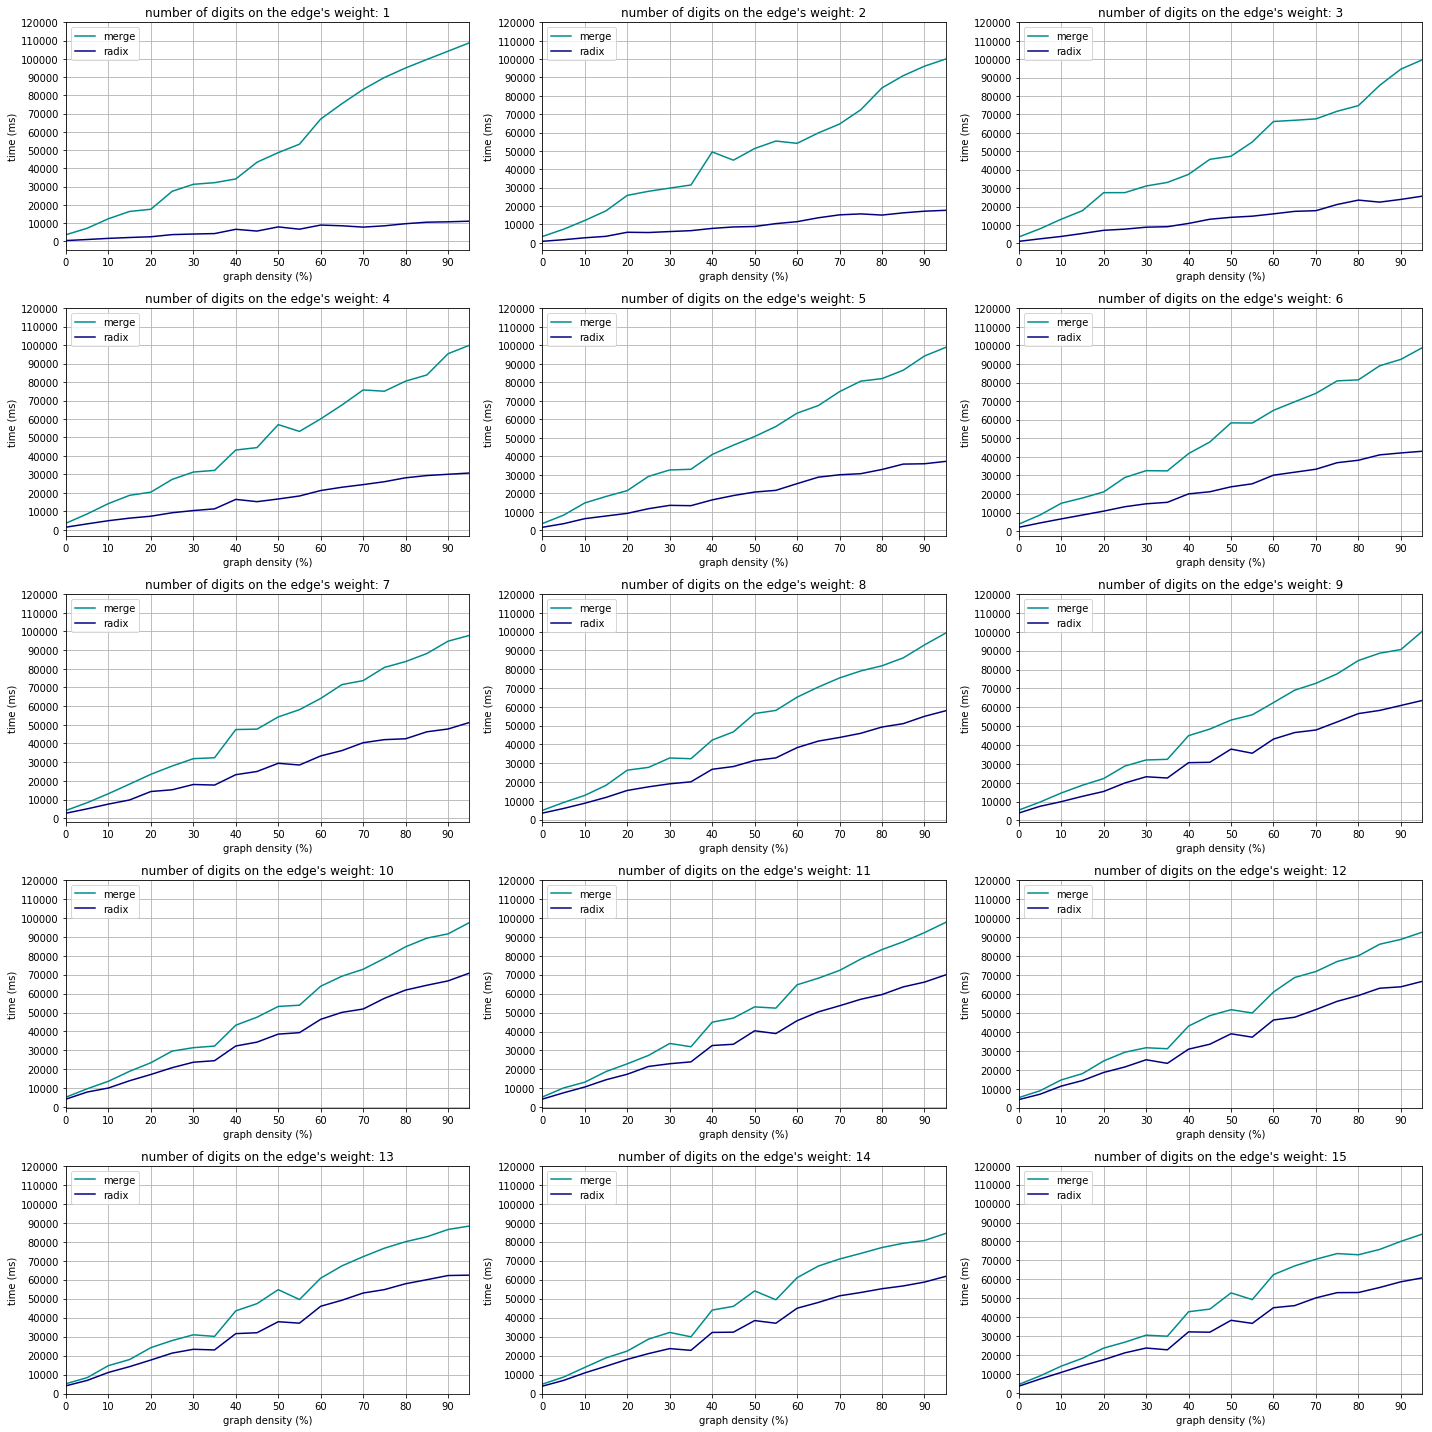

In [7]:
rot = ['0','10','20','30','40','50','60','70','80','90','100']
ys = []
for i in range(15):
    n = 0+20*i
    m = 20+20*i
    ys.append(den_m4[n:m])
    ys.append(den_r4[n:m])
    
x_ax = np.arange(20)
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(20,20))

k=0
for i in range(5):
    for j in range(3):
        y_ax = ys[k]
        k+=1
        pd.Series(y_ax, index=x_ax).plot(kind='line', ax=axs[i][j], color='darkcyan',label='merge')
        y_ax = ys[k]
        k+=1
        pd.Series(y_ax, index=x_ax).plot(kind='line', ax=axs[i][j], color='navy',label='radix')
        axs[i][j].set_yticks(range(0,130000,10000))
        axs[i][j].set_xticks(range(0,20,2))
        axs[i][j].set_xticklabels(rot)
        axs[i][j].grid(0.3)
        axs[i][j].set(xlabel='graph density (%)', ylabel='time (ms)')
        axs[i][j].set_title('number of digits on the edge\'s weight: {}'.format(int(k/2)))
        axs[i][j].legend(loc='upper left')
        
plt.tight_layout()
plt.show()

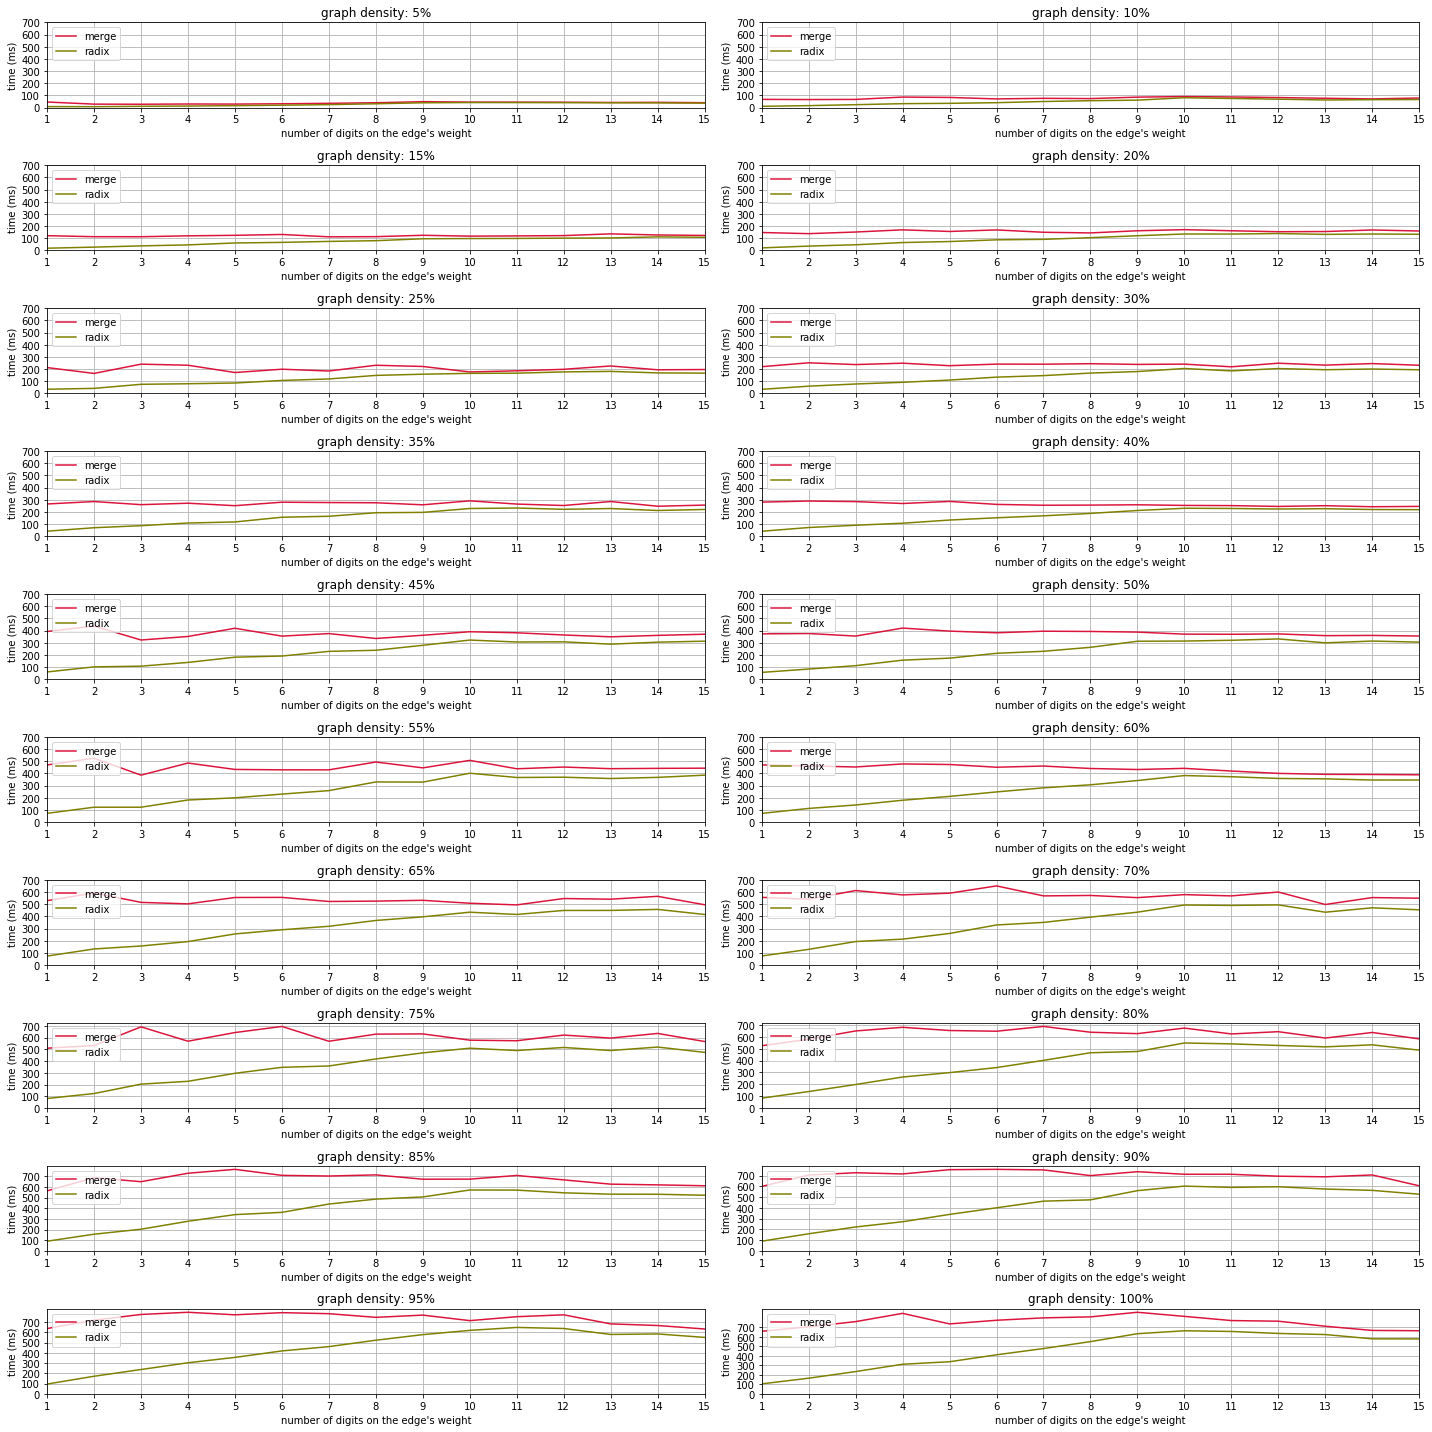

In [8]:
rot = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15']
ys = []
for i in range(20):
    n = 0+15*i
    m = 15+15*i
    ys.append(dig_m3[n:m])
    ys.append(dig_r3[n:m])
    
x_ax = np.arange(15)
fig, axs = plt.subplots(nrows=10, ncols=2, figsize=(20,20))

k=0
m=0
for i in range(10):
    for j in range(2):
        y_ax = ys[k]
        k+=1
        pd.Series(y_ax, index=x_ax).plot(kind='line', ax=axs[i][j], color='crimson',label='merge')
        y_ax = ys[k]
        k+=1
        pd.Series(y_ax, index=x_ax).plot(kind='line', ax=axs[i][j], color='olive',label='radix')
        m+=5
        axs[i][j].set_yticks(range(0,800,100))
        axs[i][j].set_xticks(range(0,15,1))
        axs[i][j].set_xticklabels(rot)
        axs[i][j].grid(0.3)
        axs[i][j].set(xlabel='number of digits on the edge\'s weight', ylabel='time (ms)')
        axs[i][j].set_title('graph density: {}%'.format(m))
        axs[i][j].legend(loc='upper left')
        
plt.tight_layout()
plt.show()

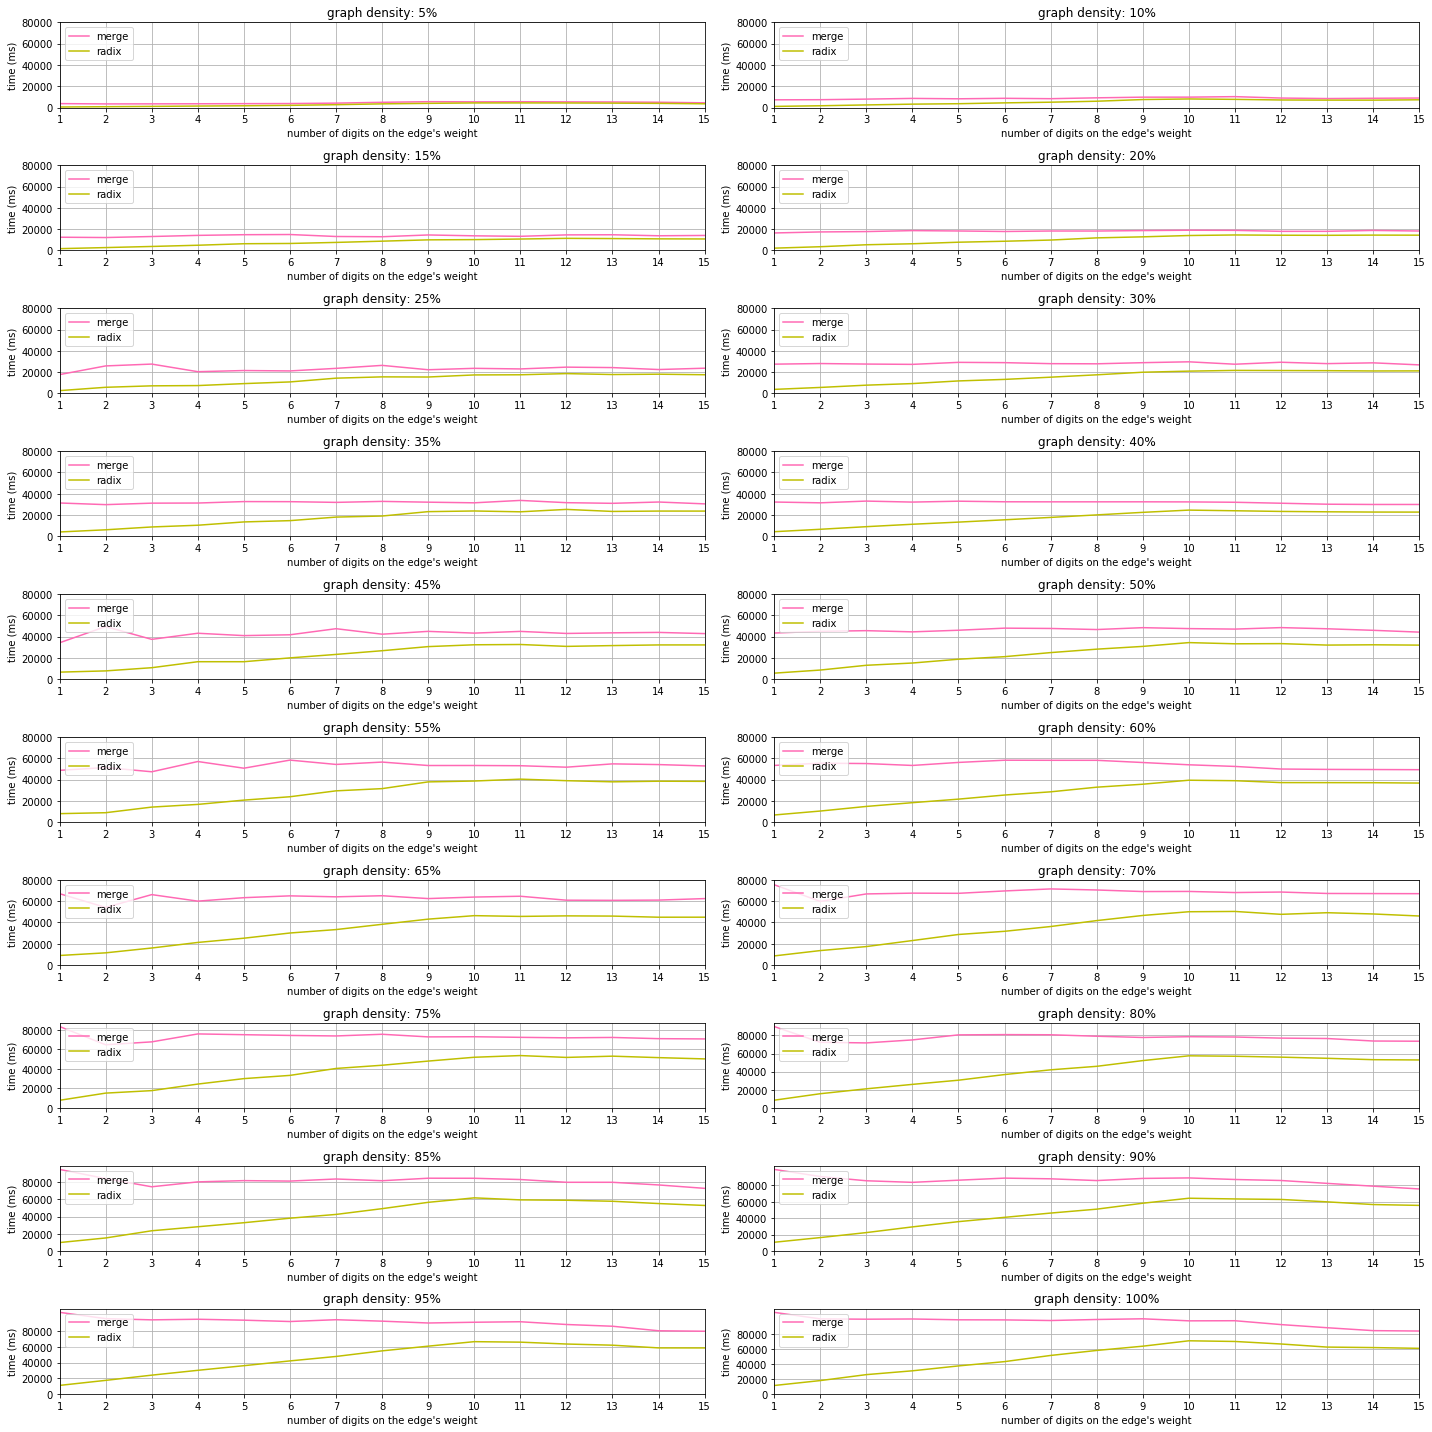

In [9]:
rot = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15']
ys = []
for i in range(20):
    n = 0+15*i
    m = 15+15*i
    ys.append(dig_m4[n:m])
    ys.append(dig_r4[n:m])
    
x_ax = np.arange(15)
fig, axs = plt.subplots(nrows=10, ncols=2, figsize=(20,20))

k=0
m=0
for i in range(10):
    for j in range(2):
        y_ax = ys[k]
        k+=1
        pd.Series(y_ax, index=x_ax).plot(kind='line', ax=axs[i][j], color='hotpink',label='merge')
        y_ax = ys[k]
        k+=1
        pd.Series(y_ax, index=x_ax).plot(kind='line', ax=axs[i][j], color='y',label='radix')
        m+=5
        axs[i][j].set_yticks(range(0,100000,20000))
        axs[i][j].set_xticks(range(0,15,1))
        axs[i][j].set_xticklabels(rot)
        axs[i][j].grid(0.3)
        axs[i][j].set(xlabel='number of digits on the edge\'s weight', ylabel='time (ms)')
        axs[i][j].set_title('graph density: {}%'.format(m))
        axs[i][j].legend(loc='upper left')
        
plt.tight_layout()
plt.show()

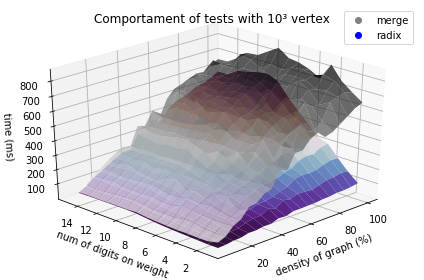

In [17]:
fig = plt.figure()
ax = plt.axes(projection="3d")

#X is density, Y is digit_numbers and Z is time
x = np.arange(5,105,5)
y = np.arange(1,16,1)

X, Y = np.meshgrid(x, y)
zs1 = np.array(den_m3)
zs2 = np.array(den_r3)
Z1 = zs1.reshape(Y.shape)
Z2 = zs2.reshape(Y.shape)

ax.set_xlabel('density of graph (%)')
ax.set_ylabel('num of digits on weight')
ax.set_zlabel('time (ms)')
ax.plot_surface(X, Y, Z2, rstride=1, cstride=1,cmap='twilight_shifted', edgecolor='none',alpha=1)
ax.plot_surface(X, Y, Z1, rstride=1, cstride=1,cmap='binary', edgecolor='none',alpha=0.7)


ax.view_init(30, 225)
ax.set_title('Comportament of tests with 10³ vertex');

fake2Dline = mpl.lines.Line2D([0],[0], linestyle="none", c='grey', marker = 'o')
fake2D2 = mpl.lines.Line2D([0],[0], linestyle="none", c='blue', marker = 'o')
ax.legend([fake2Dline,fake2D2], ['merge','radix'], numpoints = 1)

plt.tight_layout()
plt.show()

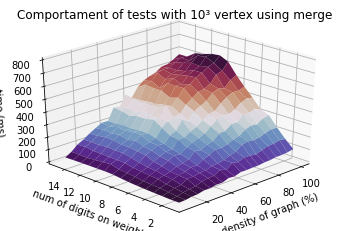

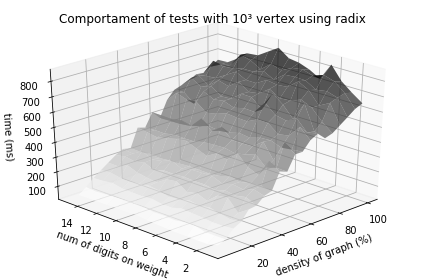

In [25]:
fig = plt.figure()
ax = plt.axes(projection="3d")

fig2 = plt.figure()
ax2 = plt.axes(projection='3d')

#X is density, Y is digit_numbers and Z is time
x = np.arange(5,105,5)
y = np.arange(1,16,1)

X, Y = np.meshgrid(x, y)
zs1 = np.array(den_m3)
zs2 = np.array(den_r3)
Z1 = zs1.reshape(Y.shape)
Z2 = zs2.reshape(Y.shape)

ax.set_xlabel('density of graph (%)')
ax.set_ylabel('num of digits on weight')
ax.set_zlabel('time (ms)')
ax.set_zlim(0,800)
ax.plot_surface(X, Y, Z2, rstride=1, cstride=1,cmap='twilight_shifted', edgecolor='none',alpha=1)

ax2.set_xlabel('density of graph (%)')
ax2.set_ylabel('num of digits on weight')
ax2.set_zlabel('time (ms)')
ax2.plot_surface(X, Y, Z1, rstride=1, cstride=1,cmap='binary', edgecolor='none',alpha=0.7)


ax.view_init(30, 225)
ax.set_title('Comportament of tests with 10³ vertex using merge');

ax2.view_init(30, 225)
ax2.set_title('Comportament of tests with 10³ vertex using radix');

plt.tight_layout()
plt.show()

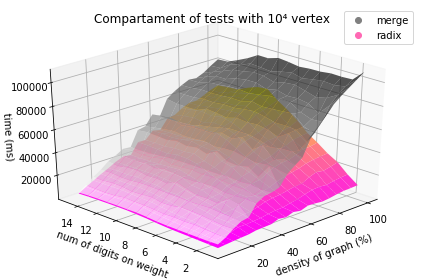

In [11]:
fig = plt.figure()
ax = plt.axes(projection="3d")

#X is density, Y is digit_numbers and Z is time
x = np.arange(5,105,5)
y = np.arange(1,16,1)

X, Y = np.meshgrid(x, y)
zs1 = np.array(den_m4)
zs2 = np.array(den_r4)
Z1 = zs1.reshape(Y.shape)
Z2 = zs2.reshape(Y.shape)

ax.set_xlabel('density of graph (%)')
ax.set_ylabel('num of digits on weight')
ax.set_zlabel('time (ms)')
ax.plot_surface(X, Y, Z2, rstride=1, cstride=1,cmap='spring', edgecolor='none',alpha=1,label='radix')
ax.plot_surface(X, Y, Z1, rstride=1, cstride=1,cmap='binary', edgecolor='none',alpha=0.7,label='merge')


ax.view_init(30, 225)
ax.set_title('Compartament of tests with 10⁴ vertex');
fake2Dline = mpl.lines.Line2D([0],[0], linestyle="none", c='grey', marker = 'o')
fake2D2 = mpl.lines.Line2D([0],[0], linestyle="none", c='hotpink', marker = 'o')
ax.legend([fake2Dline,fake2D2], ['merge','radix'], numpoints = 1)
plt.tight_layout()
plt.show()

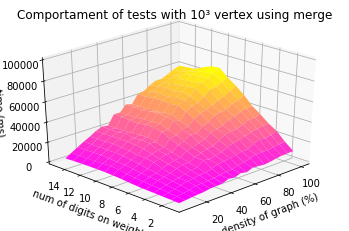

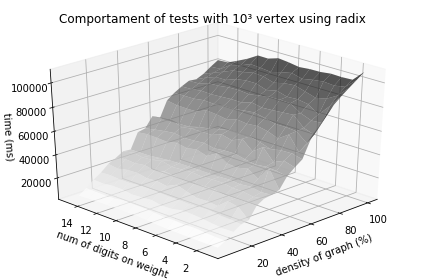

In [30]:
fig = plt.figure()
ax = plt.axes(projection="3d")

fig2 = plt.figure()
ax2 = plt.axes(projection='3d')

#X is density, Y is digit_numbers and Z is time
x = np.arange(5,105,5)
y = np.arange(1,16,1)

X, Y = np.meshgrid(x, y)
zs1 = np.array(den_m4)
zs2 = np.array(den_r4)
Z1 = zs1.reshape(Y.shape)
Z2 = zs2.reshape(Y.shape)

ax.set_xlabel('density of graph (%)')
ax.set_ylabel('num of digits on weight')
ax.set_zlabel('time (ms)')
ax.set_zlim(0,100000)
ax.plot_surface(X, Y, Z2, rstride=1, cstride=1,cmap='spring', edgecolor='none',alpha=1)

ax2.set_xlabel('density of graph (%)')
ax2.set_ylabel('num of digits on weight')
ax2.set_zlabel('time (ms)')
ax2.plot_surface(X, Y, Z1, rstride=1, cstride=1,cmap='binary', edgecolor='none',alpha=0.7)


ax.view_init(30, 225)
ax.set_title('Comportament of tests with 10³ vertex using merge');

ax2.view_init(30, 225)
ax2.set_title('Comportament of tests with 10³ vertex using radix');

plt.tight_layout()
plt.show()

In [12]:
#Results for merge varying on density on 10³
print(den_m3)

print()
print()
print()

#Results for merge varying on density on 10⁴
print(den_m4)

[45.3, 67.0, 121.3, 147.5, 212.2, 219.3, 265.6, 281.1, 392.1, 372.9, 470.1, 470.6, 529.2, 556.7, 509.7, 525.8, 562.5, 598.9, 636.9, 658.4, 27.9, 65.5, 113.1, 138.1, 163.9, 251.3, 285.7, 289.7, 437.2, 375.8, 525.7, 462.0, 593.5, 541.1, 532.5, 580.5, 686.2, 704.9, 718.7, 706.4, 27.0, 66.7, 112.8, 151.5, 240.2, 236.7, 260.1, 285.2, 322.3, 354.7, 386.3, 453.5, 515.3, 612.6, 691.6, 650.8, 648.3, 726.3, 774.4, 760.5, 29.0, 85.9, 120.2, 169.4, 231.3, 248.1, 271.9, 269.6, 351.4, 420.4, 485.9, 478.4, 503.0, 576.8, 569.3, 681.6, 727.6, 715.1, 795.8, 847.7, 28.3, 82.9, 124.3, 156.1, 171.4, 227.5, 251.6, 286.7, 418.9, 395.5, 433.3, 473.8, 555.5, 591.0, 643.1, 654.5, 764.0, 754.7, 771.0, 736.5, 30.9, 70.7, 131.3, 168.6, 198.6, 240.5, 280.3, 262.3, 354.3, 381.8, 430.0, 451.5, 556.4, 650.7, 695.2, 648.5, 707.6, 757.8, 792.0, 775.0, 34.4, 75.6, 112.0, 149.5, 183.9, 239.9, 277.4, 255.2, 375.1, 394.7, 429.9, 461.1, 522.7, 568.7, 568.8, 689.0, 701.5, 752.6, 782.0, 800.2, 39.2, 73.5, 113.4, 144.1, 231.1, 

In [13]:
#Results for radix varying on density on 10³
print(den_r3)

print()
print()
print()

#Results for radix varying on density on 10⁴
print(den_r4)

[7.6, 10.0, 18.4, 20.9, 33.9, 33.0, 41.8, 41.3, 59.6, 55.9, 72.1, 71.6, 73.8, 74.3, 80.8, 82.7, 90.5, 90.1, 95.0, 104.7, 7.0, 15.5, 27.3, 35.8, 41.0, 59.1, 70.4, 72.0, 101.4, 83.5, 122.6, 112.6, 132.2, 128.9, 123.0, 138.7, 156.3, 158.9, 171.2, 164.4, 10.0, 23.4, 37.5, 46.6, 74.4, 77.1, 87.1, 90.7, 107.3, 111.3, 122.6, 140.9, 156.7, 193.2, 203.2, 198.0, 202.9, 222.2, 237.1, 234.2, 12.2, 31.7, 45.7, 64.9, 79.1, 90.9, 109.1, 107.4, 137.9, 156.5, 181.9, 179.8, 192.9, 213.0, 227.3, 261.5, 277.5, 270.8, 302.9, 311.5, 15.3, 34.5, 61.5, 73.2, 85.1, 109.3, 117.8, 133.5, 181.1, 173.3, 199.8, 211.5, 255.7, 259.7, 295.5, 298.5, 339.8, 339.0, 355.2, 337.9, 19.1, 39.8, 66.2, 87.2, 106.1, 133.5, 156.6, 152.1, 190.5, 212.9, 230.5, 248.3, 290.1, 329.5, 346.6, 341.3, 361.0, 400.5, 418.6, 410.9, 23.8, 49.4, 74.2, 91.2, 118.5, 145.9, 164.6, 168.2, 228.8, 229.6, 259.1, 281.9, 318.6, 350.6, 357.9, 402.1, 438.9, 462.1, 460.4, 476.9, 30.9, 56.2, 80.2, 105.0, 147.7, 166.8, 193.7, 188.2, 238.0, 262.2, 330.3, 30

In [14]:
#Results for merge varying on digits on 10³
print(dig_m3)

print()
print()
print()

#Results for merge varying on digits on 10⁴
print(dig_m4)

[45.3, 27.9, 27.0, 29.0, 28.3, 30.9, 34.4, 39.2, 48.2, 44.5, 44.3, 43.4, 41.4, 42.5, 39.7, 67.0, 65.5, 66.7, 85.9, 82.9, 70.7, 75.6, 73.5, 85.4, 90.3, 86.8, 81.9, 76.0, 70.9, 78.2, 121.3, 113.1, 112.8, 120.2, 124.3, 131.3, 112.0, 113.4, 124.6, 117.7, 119.5, 122.0, 136.3, 127.2, 123.3, 147.5, 138.1, 151.5, 169.4, 156.1, 168.6, 149.5, 144.1, 161.8, 171.0, 161.8, 153.9, 155.5, 168.2, 159.9, 212.2, 163.9, 240.2, 231.3, 171.4, 198.6, 183.9, 231.1, 221.1, 176.1, 185.5, 197.9, 225.1, 193.8, 196.0, 219.3, 251.3, 236.7, 248.1, 227.5, 240.5, 239.9, 243.9, 238.1, 240.4, 218.4, 248.0, 232.2, 245.0, 231.1, 265.6, 285.7, 260.1, 271.9, 251.6, 280.3, 277.4, 275.6, 258.8, 291.4, 264.9, 253.1, 285.8, 247.1, 256.5, 281.1, 289.7, 285.2, 269.6, 286.7, 262.3, 255.2, 256.4, 259.0, 253.9, 252.2, 245.5, 251.5, 243.0, 245.8, 392.1, 437.2, 322.3, 351.4, 418.9, 354.3, 375.1, 334.8, 361.3, 390.3, 381.7, 363.6, 348.6, 360.3, 369.9, 372.9, 375.8, 354.7, 420.4, 395.5, 381.8, 394.7, 392.6, 387.4, 370.6, 369.4, 372.4, 

In [15]:
#Results for radix varying on digits on 10³
print(dig_r3)

print()
print()
print()

#Results for radix varying on digits on 10⁴
print(dig_r4)

[7.6, 7.0, 10.0, 12.2, 15.3, 19.1, 23.8, 30.9, 38.9, 40.9, 40.6, 39.9, 39.2, 38.0, 36.0, 10.0, 15.5, 23.4, 31.7, 34.5, 39.8, 49.4, 56.2, 60.7, 80.4, 74.5, 68.6, 62.1, 64.6, 65.7, 18.4, 27.3, 37.5, 45.7, 61.5, 66.2, 74.2, 80.2, 96.0, 97.8, 98.7, 101.2, 102.8, 111.5, 108.0, 20.9, 35.8, 46.6, 64.9, 73.2, 87.2, 91.2, 105.0, 120.8, 135.3, 134.8, 139.0, 132.1, 135.2, 133.0, 33.9, 41.0, 74.4, 79.1, 85.1, 106.1, 118.5, 147.7, 157.5, 164.5, 166.0, 176.3, 180.7, 168.2, 166.5, 33.0, 59.1, 77.1, 90.9, 109.3, 133.5, 145.9, 166.8, 179.3, 204.3, 184.8, 204.0, 194.4, 200.2, 194.0, 41.8, 70.4, 87.1, 109.1, 117.8, 156.6, 164.6, 193.7, 196.6, 228.4, 232.4, 221.8, 228.2, 212.0, 220.4, 41.3, 72.0, 90.7, 107.4, 133.5, 152.1, 168.2, 188.2, 212.0, 230.4, 228.7, 224.2, 227.0, 219.9, 218.9, 59.6, 101.4, 107.3, 137.9, 181.1, 190.5, 228.8, 238.0, 278.7, 321.9, 305.9, 307.2, 288.0, 304.6, 312.7, 55.9, 83.5, 111.3, 156.5, 173.3, 212.9, 229.6, 262.2, 312.1, 313.6, 320.1, 331.1, 299.0, 313.6, 304.9, 72.1, 122.6, 122.